In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

import json
import requests

In [2]:
players_df = pd.read_csv('../data/players_df.csv')
players_df.drop(columns='Unnamed: 0', inplace=True)
players_df.head()

,player_ids,player_names,player_birthdays,player_birthcities,player_birthcountries,player_nationalities,player_heights,player_weights,player_handedness,player_positions
0,8447348,Jack Laviolette,1879-07-27,Belleville,CAN,CAN,"5' 11""",170.0,R,Defenseman
1,8449231,Ken Thompson,1881-05-29,Oakengates,GBR,GBR,"5' 10""",160.0,L,Left Wing
2,8450014,Bert Lindsay,1881-07-23,Garafraxa County,CAN,CAN,"5' 7""",160.0,R,Goalie
3,8446669,Joe Hall,1882-05-03,Staffordshire,GBR,GBR,"5' 10""",175.0,R,Defenseman
4,8448154,Didier Pitre,1883-09-01,Valleyfield,CAN,CAN,"5' 11""",185.0,R,Right Wing


In [3]:
rosters_df = pd.read_csv('../data/rosters_df.csv')
rosters_df.drop(columns='Unnamed: 0', inplace=True)
rosters_df.head()

,season,team_ids,team_names,player_ids,player_names
0,1917-1918,36,Eagles,8445135,George Boucher
1,1917-1918,36,Eagles,8445191,Morley Bruce
2,1917-1918,36,Eagles,8445802,Rusty Crawford
3,1917-1918,36,Eagles,8445844,Jack Darragh
4,1917-1918,36,Eagles,8445874,Cy Denneny


In [4]:
rosters_df['player_birthdays'] = [players_df[players_df['player_ids'] == i]['player_birthdays'].values[0] for i in rosters_df['player_ids']]
rosters_df['player_birthcities'] = [players_df[players_df['player_ids'] == i]['player_birthcities'].values[0] for i in rosters_df['player_ids']]
rosters_df['player_birthcountries'] = [players_df[players_df['player_ids'] == i]['player_birthcountries'].values[0] for i in rosters_df['player_ids']]
rosters_df['player_nationalities'] = [players_df[players_df['player_ids'] == i]['player_nationalities'].values[0] for i in rosters_df['player_ids']]
rosters_df['player_heights'] = [players_df[players_df['player_ids'] == i]['player_heights'].values[0] for i in rosters_df['player_ids']]
rosters_df['player_weights'] = [players_df[players_df['player_ids'] == i]['player_weights'].values[0] for i in rosters_df['player_ids']]
rosters_df['player_handedness'] = [players_df[players_df['player_ids'] == i]['player_handedness'].values[0] for i in rosters_df['player_ids']]

In [5]:
rosters_df.head()

,season,team_ids,team_names,player_ids,player_names,player_birthdays,player_birthcities,player_birthcountries,player_nationalities,player_heights,player_weights,player_handedness
0,1917-1918,36,Eagles,8445135,George Boucher,1896-08-19,Ottawa,CAN,CAN,"5' 9""",169.0,L
1,1917-1918,36,Eagles,8445191,Morley Bruce,1894-03-07,North Gower,CAN,CAN,"5' 9""",170.0,R
2,1917-1918,36,Eagles,8445802,Rusty Crawford,1885-11-07,Cardinal,CAN,CAN,"5' 11""",165.0,L
3,1917-1918,36,Eagles,8445844,Jack Darragh,1890-12-04,Ottawa,CAN,CAN,"5' 10""",168.0,R
4,1917-1918,36,Eagles,8445874,Cy Denneny,1891-12-23,Farran's Point,CAN,CAN,"5' 7""",168.0,L


In [6]:
#Converting player heights to floats (inches)

rosters_df['player_heights_inches'] = rosters_df['player_heights']
rosters_df[['player_heights_inches_from_feet','player_heights_remaining_inches']] = rosters_df['player_heights_inches'].str.split("'",expand=True)

rosters_df['player_heights_remaining_inches'] = rosters_df['player_heights_remaining_inches'].map(lambda x: float(str(x).strip('"')))
rosters_df['player_heights_inches_from_feet'] = rosters_df['player_heights_inches_from_feet'].map(lambda x: float(x) * 12)

rosters_df['player_heights_inches'] = rosters_df['player_heights_inches_from_feet'] + rosters_df['player_heights_remaining_inches']


In [7]:
#Drop the extra height columns created along the way
rosters_df.drop(columns=['player_heights_inches_from_feet', 'player_heights_remaining_inches'], inplace=True)

In [8]:
#Break out birthday year, months and days into seperate columns

rosters_df['player_birth_years'] = rosters_df['player_birthdays']
rosters_df[['player_birth_years','player_birth_months', 'player_birth_days']] = rosters_df['player_birth_years'].str.split('-',expand=True)



In [9]:
#Recast them as integers

rosters_df['player_birth_years'] = rosters_df['player_birth_years'].map(lambda x: int(x))
rosters_df['player_birth_months'] = rosters_df['player_birth_months'].map(lambda x: int(x))
rosters_df['player_birth_days'] = rosters_df['player_birth_days'].map(lambda x: int(x))
# rosters_df['player_weights'] = rosters_df['player_weights'].map(lambda x: int(x))

In [10]:
rosters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52605 entries, 0 to 52604
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 52605 non-null  object 
 1   team_ids               52605 non-null  int64  
 2   team_names             52605 non-null  object 
 3   player_ids             52605 non-null  int64  
 4   player_names           52605 non-null  object 
 5   player_birthdays       52605 non-null  object 
 6   player_birthcities     52601 non-null  object 
 7   player_birthcountries  52605 non-null  object 
 8   player_nationalities   52605 non-null  object 
 9   player_heights         52576 non-null  object 
 10  player_weights         52579 non-null  float64
 11  player_handedness      52260 non-null  object 
 12  player_heights_inches  52576 non-null  float64
 13  player_birth_years     52605 non-null  int64  
 14  player_birth_months    52605 non-null  int64  
 15  pl

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html

#### Avg. Player Height by Season

Average NHL player height has increased by about 4 inches over the last century from around 69 inches (5'9") to around 73 inches (6'1"). Although there wasa dip around 1940 and somewhat of a leveling off over the last 20 years, average height has been been increasing at a fairly consistant rate.

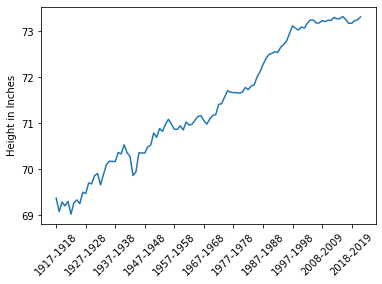

In [11]:
fig, ax = plt.subplots()
# ax = plt.gca()
ax.plot(rosters_df.groupby('season')['player_heights_inches'].mean())
# ax.axes.xaxis.set_visible(False)
ticks = rosters_df.groupby('season')['player_heights_inches'].mean().index[::10]
plt.xticks(ticks, rotation=45)
# ax.set_xticks(rosters_df.groupby('season')['player_heights_inches'].mean().index[::10])
plt.ylabel("Height in Inches");

#### Avg. Player Weight by Season

Similar to the 'Average Height' report, weight has also been steadily increasing over the last century. Interstingly though there's been a decrease over the last 20 (which is on par with the leveling-off we saw in the height graph).

While physicality has and always will be an important factor in the game, skating ability and overall game speed has increased tremendously as training techniques,  facilities and player equipment has improved over the years. This means a player's speed and quickness is more imorant than ever, which could be contributing the declining average weight.

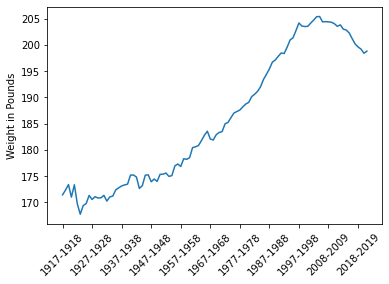

In [12]:
# fig, ax = plt.subplots(1,2, figsize=(16,4))
fig, ax = plt.subplots()
# ax = plt.gca()
ax.plot(rosters_df.groupby('season')['player_weights'].mean())
# ax.axes.xaxis.set_visible(False)
ticks = rosters_df.groupby('season')['player_weights'].mean().index[::10]
plt.xticks(ticks, rotation=45)
# ax.set_xticks(rosters_df.groupby('season')['player_weights'].mean().index[::10])
plt.ylabel("Weight in Pounds");

#### Avg. Player Age by Season

Average player age has flucuated over the last century, but the total trend line shows that the total average decrease in age isn't that significant.

Important to note that the technique for calculating each players' age by season was NOT an exact process. These numbers should be taken with a grain of salt.

In [53]:
# Add new column to rosters_df for each players age by season
# For the sake of this initial trend report I'm digging that hard into exact ages. Simply an approximation.
# int(rosters_df['season'][0][0:4])
rosters_df['season_start_year'] = [int(i[0:4]) for i in rosters_df['season']]
rosters_df['approx_player_age'] = rosters_df['season_start_year'] - rosters_df['player_birth_years']

y=-0.002807x+(26.351333)


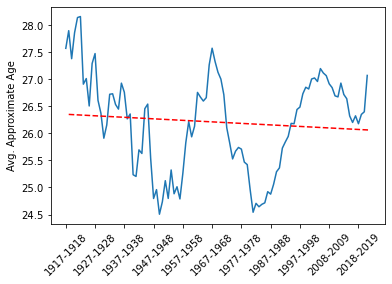

In [54]:
# fig, ax = plt.subplots(1,2, figsize=(16,4))
fig, ax = plt.subplots()
# ax = plt.gca()
ax.plot(rosters_df.groupby('season')['approx_player_age'].mean())
# ax.axes.xaxis.set_visible(False)
ticks = rosters_df.groupby('season')['approx_player_age'].mean().index[::10]
plt.xticks(ticks, rotation=45)
# ax.set_xticks(rosters_df.groupby('season')['player_weights'].mean().index[::10])
plt.ylabel("Avg. Approximate Age")

x = [i for i in range(1, len(rosters_df.groupby('season')['approx_player_age'].mean().index) + 1)]
y = rosters_df.groupby('season')['approx_player_age'].mean().values

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--");

print(f"y=%.6fx+(%.6f)"%(z[0],z[1]))


#### Side-by-side Comparison

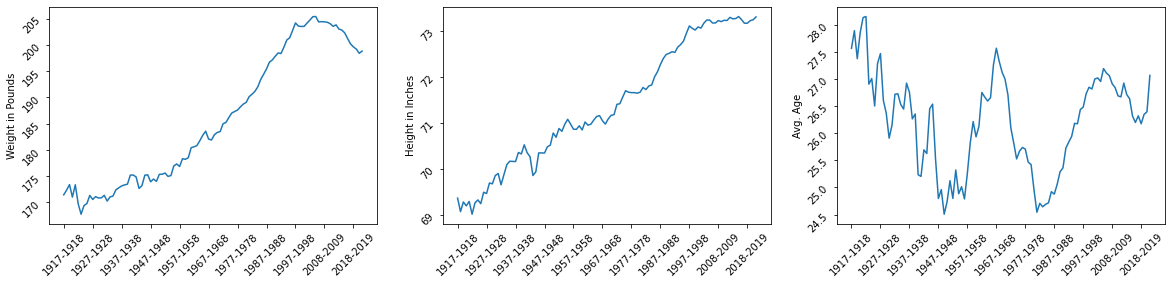

In [62]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

ax[0].plot(rosters_df.groupby('season')['player_weights'].mean())
ax[0].set_ylabel('Weight in Pounds')
weight_ticks = rosters_df.groupby('season')['player_weights'].mean().index[::10]
ax[0].set_xticks(rosters_df.groupby('season')['player_weights'].mean().index[::10])
ax[0].tick_params(labelrotation=45)
plt.ylabel("Weight in Pounds")

ax[1].plot(rosters_df.groupby('season')['player_heights_inches'].mean())
ax[1].set_ylabel('Height in Inches')
height_ticks = rosters_df.groupby('season')['player_heights_inches'].mean().index[::10]
ax[1].set_xticks(rosters_df.groupby('season')['player_heights_inches'].mean().index[::10])
ax[1].tick_params(labelrotation=45)

ax[2].plot(rosters_df.groupby('season')['approx_player_age'].mean())
ax[2].set_ylabel('Avg. Age')
age_ticks = rosters_df.groupby('season')['approx_player_age'].mean().index[::10]
ax[2].set_xticks(rosters_df.groupby('season')['approx_player_age'].mean().index[::10])
ax[2].tick_params(labelrotation=45)

#### Geography

How many players from players_df have differing birth countries and nationalities?

In [104]:
total_players = len(players_df)
diff_count = len(players_df[players_df['player_birthcountries'] != players_df['player_nationalities']])
percent_of_total = round(diff_count/total_players, 2)

print(f'Total players: {total_players}')
print(f'Players with nationalities different than their birth country: {diff_count}')
print(f'Percentage: {percent_of_total}')

Total players: 8206
Players with nationalities different than their birth country: 128
Percentage: 0.02


In [105]:
players_df.groupby(players_df['player_nationalities']).count().sort_values(by='player_ids', ascending=False).head(10)

,player_ids,player_names,player_birthdays,player_birthcities,player_birthcountries,player_heights,player_weights,player_handedness,player_positions
player_nationalities,,,,,,,,,
CAN,5354,5354,5354,5354,5354,5345,5345,5293,5354
USA,1344,1344,1344,1344,1344,1342,1342,1330,1344
SWE,373,373,373,373,373,373,373,373,373
RUS,269,269,269,269,269,269,269,269,269
CZE,245,245,245,245,245,245,245,245,245
FIN,245,245,245,244,245,245,245,245,245
SVK,88,88,88,88,88,88,88,88,88
CHE,44,44,44,43,44,44,44,44,44
GBR,44,44,44,44,44,44,44,44,44


<ipython-input-120-ca1081ca69d1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45);


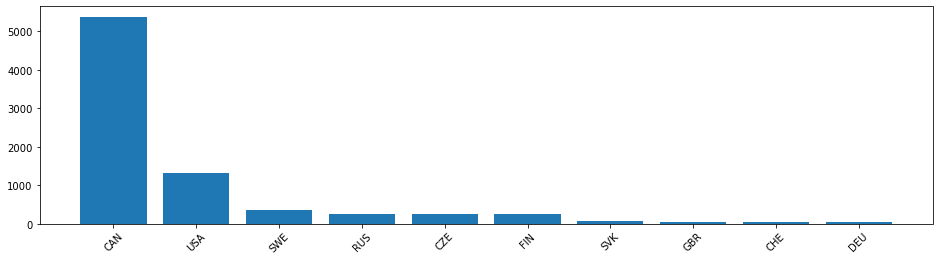

In [120]:
birthcountries_df = players_df.groupby(players_df['player_birthcountries'])['player_ids'].count().sort_values(ascending=False)

x = birthcountries_df.index[0:10]
y = birthcountries_df.values[0:10]

fig, ax = plt.subplots(figsize=(16,4))
ax.bar(x, y)
ax.set_xticklabels(x, rotation=45);

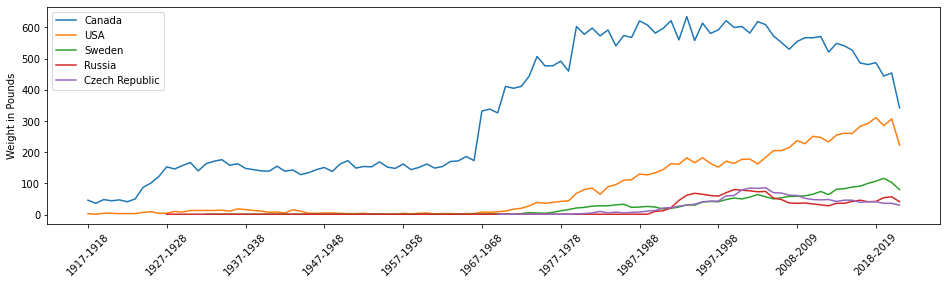

In [119]:
# rosters_df.groupby('player_nationalities').count().sort_values('season', ascending=False).head(10)
can = rosters_df[rosters_df['player_nationalities'] == 'CAN'].groupby('season')['player_ids'].count()
usa = rosters_df[rosters_df['player_nationalities'] == 'USA'].groupby('season')['player_ids'].count()
swe = rosters_df[rosters_df['player_nationalities'] == 'SWE'].groupby('season')['player_ids'].count()
rus = rosters_df[rosters_df['player_nationalities'] == 'RUS'].groupby('season')['player_ids'].count()
cze = rosters_df[rosters_df['player_nationalities'] == 'CZE'].groupby('season')['player_ids'].count()

fig, ax = plt.subplots(figsize=(16,4))

ax.plot(can, label='Canada')
ax.plot(usa, label='USA')
ax.plot(swe, label='Sweden')
ax.plot(rus, label='Russia')
ax.plot(cze, label='Czech Republic')
ax.legend()

ticks = can.index[::10]
plt.xticks(ticks, rotation=45)

plt.ylabel("Weight in Pounds");

#### Size by position

In [134]:
players_df.groupby('player_positions')[]

SyntaxError: invalid syntax (<ipython-input-134-ec397e60d5a4>, line 1)

In [135]:
#Converting player heights to floats (inches)

players_df['player_heights_inches'] = players_df['player_heights']
players_df[['player_heights_inches_from_feet','player_heights_remaining_inches']] = players_df['player_heights_inches'].str.split("'",expand=True)

players_df['player_heights_remaining_inches'] = players_df['player_heights_remaining_inches'].map(lambda x: float(str(x).strip('"')))
players_df['player_heights_inches_from_feet'] = players_df['player_heights_inches_from_feet'].map(lambda x: float(x) * 12)

players_df['player_heights_inches'] = players_df['player_heights_inches_from_feet'] + players_df['player_heights_remaining_inches']


In [136]:
#Drop the extra height columns created along the way
players_df.drop(columns=['player_heights_inches_from_feet', 'player_heights_remaining_inches'], inplace=True)

In [137]:
position_size_df = players_df.groupby('player_positions')['player_heights_inches', 'player_weights'].mean().sort_values(by='player_weights', ascending=False)
position_size_df

<ipython-input-137-66957328c00b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  position_size_df = players_df.groupby('player_positions')['player_heights_inches', 'player_weights'].mean().sort_values(by='player_weights', ascending=False)


,player_heights_inches,player_weights
player_positions,,
Defenseman,72.939243,198.727840
Left Wing,72.056663,192.144368
Right Wing,71.845642,190.842981
Center,71.676708,187.201721
Goalie,71.898058,185.080194


<ipython-input-138-61974278b7a2>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

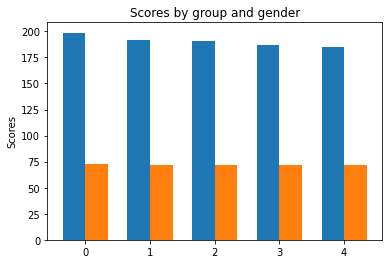

In [138]:
labels = position_size_df.index
player_weights = position_size_df['player_weights']
player_heights_inches = position_size_df['player_heights_inches']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, player_weights, width, label='player_weights')
rects2 = ax.bar(x + width/2, player_heights_inches, width, label='Woplayer_heights_inchesmen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

#### Handedness

In [139]:
players_df.groupby('player_handedness')['player_handedness'].count()

player_handedness
L    5358
R    2773
Name: player_handedness, dtype: int64